# Project 2: Investigate a dataset
Student : Spyridoula Koumousi                                                                                                   
Date: 17/01/21

# Investigating the TMDB movie database 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

The analysis of the movies will be focused mainly on the genre of the movies, their popularity, rating and financial data.     
The questions posed are:                                                                                                        
Q1: How many movies are produced in total per year?                                                                                
Q2: What are the most popular genres of all time? Is polularity and vote average of these genres associated with the amount of movies made for each?                                                                                                           
Q3: Do more popular movies have higher ratings?                                                                                 
Q4: Which movie genre is more profitable?

In order to investigate this dataset the following steps have been followed:                      
    1) Data inspection: visual inspection of the dataset format and information included.                                        
    2) Data wrangling : cleaning of data                                                                                         
    3) Data exploration: several questions posed and data analysed to draw conclusions from                                   
    4) Conclusions and visualisations. 
    
A few information for the dataset from the source:                                                                              
● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.                          
● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.                
● The final two columns ending with “_adj” show the budget andrevenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


# Import packages for the data analysis
Import all needed packages to perform data analysis

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Read the data from csv format 

In [226]:
#Read the data and investigate format
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Investigate the movie data
Check the format, size of dataframe and number of unique values. The below steps are performed so that we can have an idea about the kind of data contained in the dataframe and their status.

In [227]:
#Check the size of the dataframe
df.shape

(10866, 21)

In [228]:
#Check the general info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the above we can see that there are several missing values for some columns such as director, tagline , production companies etc. These columns do not seem particularly interesting for our analysis as they probably contain names of companies, directors etc. We keep the above info in mind for the data cleaning process that will follow.

In [229]:
#Check the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

The unique values above give another metric for the different values on our dataset. We can see that we have 10865 unique ids whereas the total length of our dataset was 10866. This is a first indication that there is at least one duplicate movie in the dataset. We can investigate this further in the section that checks for duplicates.

For the purpose of the initial investigation it would be interesting to also have an initial visualisation of the distribution of some of the quantitative data. For this purpose we can plot a simple histogram of these columns.

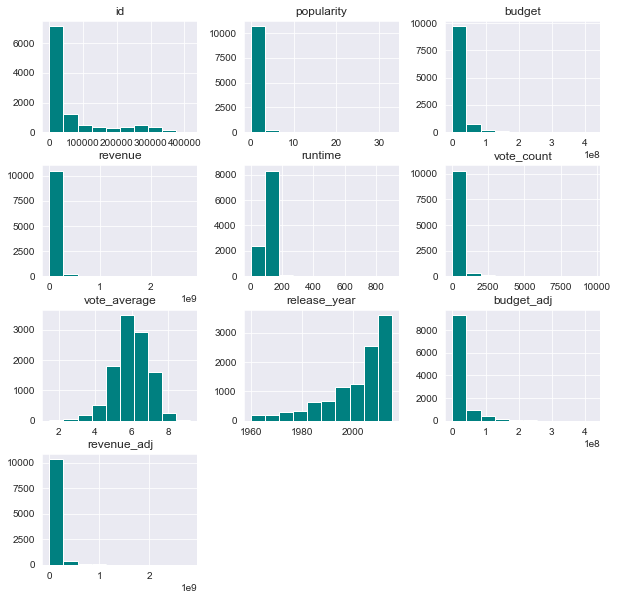

In [230]:
df.hist(figsize=(10,10), color='teal');

From the above it is worth noticing that a lot of the columns contain high number of zero data values. This is something also interesting that we will need to tackle in the cleaning phase.
The next step is focused on cleaning the data and keeping the information needed to answer our questions.

# Wrangle the data
In this step we will investigate the dataset for null values, duplicates and missing values.                                   We will wrange the data in order to fix such issues. 
First we will drop some columns which do not contain valueable information for our analysis. This is done at an early step in order to avoid wrangling of data that we do not care about. Since our analysis will focus on the movie genres, their popularity, rating and their profitability we can safely remove any columns that have info regarding cast, director, tagline and overview and the id of the movie.

In [231]:
#Drop columns that are not going to be needed for the data analysis
df.drop(['id','imdb_id','homepage','tagline','production_companies','overview','keywords','cast','director'],axis=1,inplace=True)

The next step would be to check for duplicated data in the remaining part of the dataset.

In [232]:
# Then we will check for duplicated data
df.duplicated().sum()

1

We can see that there is one duplicated row which also matches our observation from the unique values analysis above. We can then proceed to check which data is duplicated and remove it from the dataset.

In [233]:
# check which line is duplicated
df[df.duplicated()==True]
#we can see that the movie TEKKEN is duplicated
df[df.original_title == 'TEKKEN']

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


In [234]:
#drop duplicate lines
df.drop_duplicates(inplace=True)

#check that there are no more duplicates
if (df.duplicated().sum() != 0):
    print ('There are still duplicates')
else:
    print ('No more duplicates')

No more duplicates


Before moving on we can rename some columns to reduce their name size so that we can use their name easier. We will rename the 'original title' to 'title' and the 'release_year' to 'year'

In [235]:
#rename 'original title' to 'title' and 'release_year' to 'year'
df.rename(columns={"original_title": "title", "release_year" : "year"},inplace=True)

The next step is to check for any columns that have null data. Depending on the columns that the null data appear we can choose whether to remove these datapoints from our dataset or replace them with the mean value for that feature.

In [236]:
#Check for null data
df.isnull().sum()

popularity       0
budget           0
revenue          0
title            0
runtime          0
genres          23
release_date     0
vote_count       0
vote_average     0
year             0
budget_adj       0
revenue_adj      0
dtype: int64

From the above we can see that only 23 movies do not have genre information. The amount of these movies is not significant so we can remove them from the dataset without jeoperdising the integrity of our dataset. There are still a lot of movie data to analyse.

In [237]:
#Compute the proportion of movies that do not contain genre info
df.isnull().genres.sum() / len(df)

0.002116889093419236

In [238]:
# Remove null data
df.dropna(inplace=True) 
# check that there are no longer null data
df.isnull().sum()

popularity      0
budget          0
revenue         0
title           0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
year            0
budget_adj      0
revenue_adj     0
dtype: int64

In [239]:
#Check again the size of the dataframe to double check the removed data
df.shape

(10842, 12)

During the visualisation of the data we observed a lot of 0 value data - we should convert them to NULL so that we can safely 
remove them from the dataframe. We can see that there a lot of zero values for revenue and budget. We can remove the outliers by converting them to NaN, however we do not remove the NULL value rows yet from the dataset as we will need these rows for the genre and popularity analysis. We will remove them once we move towards the budget/revenue analysis.

In [240]:
# Convert zero to NULL values so that they can safely be removed later.
# This wrangling step will be completed only after the initial data analysis for the movie genre.
cols = ['revenue', 'budget', 'revenue_adj', 'budget_adj']
df[cols] = df[cols].replace(0,np.NaN)
df.isnull().sum()


popularity         0
budget          5674
revenue         5993
title              0
runtime            0
genres             0
release_date       0
vote_count         0
vote_average       0
year               0
budget_adj      5674
revenue_adj     5993
dtype: int64

Check the percentage of NULL over valid values in the remaining columns.

In [241]:
#Compute the proportion of movies that do not contain financial info
df.isnull().sum()/ len(df)

popularity      0.000000
budget          0.523335
revenue         0.552758
title           0.000000
runtime         0.000000
genres          0.000000
release_date    0.000000
vote_count      0.000000
vote_average    0.000000
year            0.000000
budget_adj      0.523335
revenue_adj     0.552758
dtype: float64

We can see that over 50% of the datapoints in our dataset do not contain information regarding the budget and revenue.

From the dataset information we have been made aware that each movie might be tagged with multiple movie genres, and each genre is separated by a pipe symbol "|". Ideally we want to be able to enlist all the genres the movie belongs to and be able to perform queries based on that. One solution would be to keep only the first genre type for each row. However that would intervene a lot with our data. For this reason I decided to split and create a separate row for every genre so that each movie can be analysed for all the genre types it belongs to. This would create some duplicated data but the rows are not exactly the same as the genre would be different. This step does not cause any harm to our dataset.

In [242]:
lst_col = 'genres' 

x = df.assign(**{lst_col:df[lst_col].str.split('|')})

df= (df.set_index(df.columns.drop('genres',1).tolist())
       .genres.str.split('|', expand=True)
       .stack()
       .reset_index()
       .rename(columns={0:'genres'})
       .loc[:, df.columns]
    )


In [243]:
df.head(5)

,popularity,budget,revenue,title,runtime,genres,release_date,vote_count,vote_average,year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
2,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
3,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


With this step we conclude the initial wrangling of our data. Indeed possibly more cleaning could be performed however the dataset is now in a good state to start our analysis and investigation. 

# Data analysis
In this step we will pose a few questions that come to mind for this dataset and we will try to answer them. Visualisations will be plotted when necessary to support our analysis and help draw some conclusions.

# Q1: How many movies were produced in total per year?

It would be interesting to see how the production of movies has progressed in the last decades.                                 We can assume that more movies are made per year as the time passes.

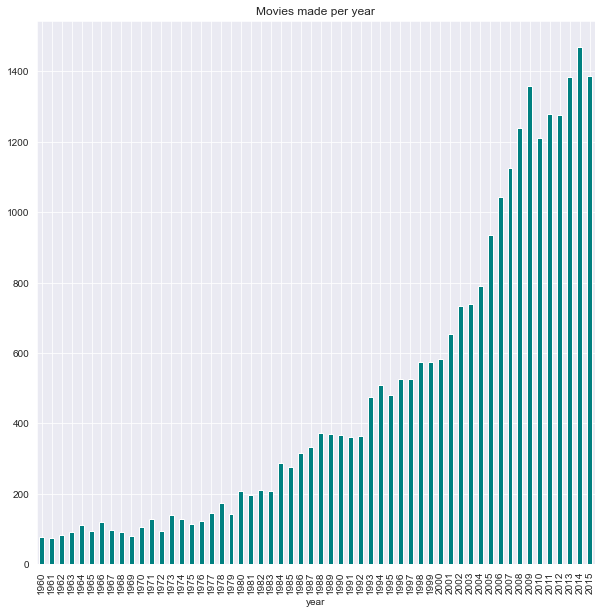

In [244]:
#how many movies of each type are made per year? (plot)
movie_counts = df.groupby(['year']).count()['title']

movie_counts.plot.bar(figsize=(10,10) , title = "Movies made per year",color ='teal');

Our assumption was correct. Indeed more movies are made per year as the decades progress.

We can also print a few statistics regarding the movie count per year. We can see that there are 481 movies made per year on average however there is a big std deviation which is explained by the above plot. We can see that there is a steep increase of movies made per year the early 90's.

In [245]:
movie_counts.describe()

count      56.000000
mean      481.339286
std       431.296408
min        75.000000
25%       126.500000
50%       347.000000
75%       674.750000
max      1470.000000
Name: title, dtype: float64

# Q2: What are the most popular genres of all time? Is polularity and vote average of these genres associated with the amount of movies made for each?

First it would be interesting to see which movie genre has had the most films made. 

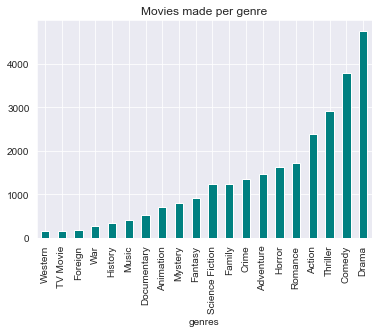

In [246]:
movies_by_genre = df.groupby(['genres']).count()['title'].sort_values()
movies_by_genre.plot.bar(fig=(10,10),title= 'Movies made per genre',color= 'teal');    

From the graph above we can see that there are more dramas filmed from the 60's until 2015.
One could wonder if indeed Drama is one of the most popular genres and that is why there are more Drama movies made.
For this we should find what is the average popularity of each movie genre and compare our findings with the above graph.

In [247]:
pop_per_genre = df.groupby(['genres']).popularity.mean()
pop_per_genre.sort_values(ascending= False)

genres
Adventure          1.154259
Science Fiction    1.001548
Fantasy            0.992840
Action             0.926274
Animation          0.852182
Family             0.786668
Crime              0.744930
Thriller           0.741563
War                0.727683
Mystery            0.690012
Comedy             0.592607
Romance            0.592082
Drama              0.591495
Western            0.590615
History            0.575936
Music              0.487321
Horror             0.465357
TV Movie           0.270896
Foreign            0.191496
Documentary        0.181432
Name: popularity, dtype: float64

We can observe that the most popular genres are not the ones with the highest count of movies made. 
This could be due to the fact that Adventures, Science Fiction and Fantasy are newer movie genres with respect to drama,comedy etc.
Furthermore, after taking a look at our initial histograms during the investigation we can see that the popularity is positively skewed towards 0 so it could be that some movies have not received a popularity mark. 
It would be interesting to do a similar analysis for the vote average mark.

In [248]:
vote_per_genre = df.groupby(['genres']).vote_average.mean()
vote_per_genre.sort_values(ascending= False)

genres
Documentary        6.908462
Music              6.480392
History            6.410479
Animation          6.403147
War                6.297778
Drama              6.165546
Crime              6.124889
Western            6.083030
Romance            6.042874
Family             5.997563
Foreign            5.981383
Mystery            5.946790
Adventure          5.940585
Comedy             5.905167
Fantasy            5.863537
TV Movie           5.788024
Action             5.787752
Thriller           5.750671
Science Fiction    5.665582
Horror             5.337447
Name: vote_average, dtype: float64

Again results do not seem to agree with the number of movies made for each genre. The genres with the highest vote averages are among others Documentaries, History, War etc which target more knowledge and less entertainement. Higher average voting for these genres is expected.

From the above analysis, I couldn't help but wonder if Adventure was more popular because young people have been shifting the popularity of the movies in the last decades  towards Adventures, and that Dramas used to be more popular in the past ( where popularity was not counted- but we can tell by the amount of movies made). To answer this question I would like to see the evolution of Adventure and Drama movies made over the years. My initial expectation is that more Dramas were filmed in the beginning of 60's-70's-80's and more Adventures are made in the latest decades.

First we will create a new column to indicate the decade in which the movie was released so that we can analyse the data per decade.

In [249]:
# Create a new column to show the decade of the movie in order to perform analysis on the two Genre types ( Adventure and Drama)
# with respect to the total movie count made and the popularity of each genre

def label_decade (row):
   if (row['year'] >= 1960 and row['year'] < 1970) :
      return 1960
   if (row['year'] >= 1970 and row['year'] < 1980) :
      return 1970
   if row['year'] >= 1980 and row['year'] < 1990 :
      return 1980
   if row['year'] >= 1990 and row['year'] < 2000 :
      return 1990    
   if row['year'] >=2000 and row['year'] < 2010 :
      return 2000
   if row['year'] >= 2010 and row['year'] < 2020 :
      return 2010    
   return 'Other'

df['decade'] = 0
df['decade'] = df.apply(lambda row: label_decade(row), axis=1)


PS to reviewer: Please let me know if there is a better way to do the above year to decade transition. 

Find the amount of Dramas filmed per decade:

In [250]:
# Drama movie count per decade
drama_movie_cnt = df.query('genres =="Drama"').groupby(['decade']).title.count()

Find the amount of Adventures filmed per decade:

In [251]:
# Adventure movie count per decade
adv_movie_cnt = df.query('genres =="Adventure"').groupby(['decade']).title.count()

Plot the amount of Drama and Adventure films made per decade in a histogram plot so that we can compare them. 

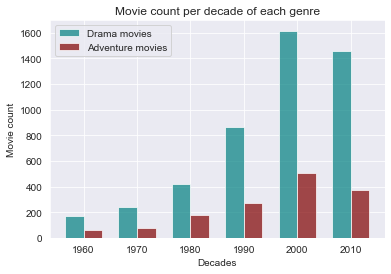

In [252]:
ind = np.arange(len(drama_movie_cnt))  # the x locations for the groups
width = 0.35                           # the width of the bars

# plot bars
teal_bars = plt.bar(ind, drama_movie_cnt, width, color='teal', alpha=.7, label='Drama movies')
maroon_bars = plt.bar(ind + width, adv_movie_cnt, width, color='maroon', alpha=.7, label='Adventure movies')

# title and labels
plt.ylabel('Movie count')
plt.xlabel('Decades')
plt.title('Movie count per decade of each genre')
locations = ind + width / 2  # xtick locations
labels = adv_movie_cnt.index.array
plt.xticks(locations,labels)

# legend
plt.legend();

From the above we can see that even though there is an increase in the Adventures being made as the decades pass, there are still more dramas being made in the last decades. It would be now be interesting to see what has happened with the popularity of these two movie types in the passing of the decades.

In [253]:
# Drama popularity mean per decade
drama_pop_mean = df.query('genres =="Drama"').groupby(['decade']).popularity.mean()

In [254]:
# Adventure popularity mean per decade
adv_pop_mean = df.query('genres =="Adventure"').groupby(['decade']).popularity.mean()

Plot the popularity of Drama and Adventure films made per decade in a histogram plot so that we can compare them.

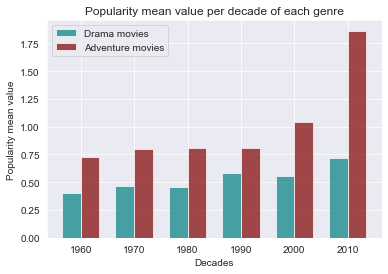

In [255]:
ind = np.arange(len(drama_movie_cnt))  # the x locations for the groups
width = 0.35                           # the width of the bars

# plot bars
teal_bars = plt.bar(ind, drama_pop_mean, width, color='teal', alpha=.7, label='Drama movies')
maroon_bars = plt.bar(ind + width, adv_pop_mean, width, color='maroon', alpha=.7, label='Adventure movies')

# title and labels
plt.ylabel('Popularity mean value')
plt.xlabel('Decades')
plt.title('Popularity mean value per decade of each genre')
locations = ind + width / 2  # xtick locations
labels = adv_pop_mean.index.array
plt.xticks(locations,labels)

# legend
plt.legend();

From the above we can observe the following:                                                                                      
    1) There are lot more Drama movies made in each decade and less Adventures.                                                  
    2) The popularity of adventures is significally higher than the ones of Dramas and the latter had a steep rise in 2010's.
We can see from the above that the initial assumption that Adventures are more popular because there are more movies made in the 2000's is false. That could mean that either the interest of the crowd has shifted to adventures or that there are far more Dramas made whose quality is poor and do not become popular.
Unfortunately we cannot  conclude about the above without having enough information about how popularity index is measured.

# Q3: Do more popular movies have higher ratings?

Another interesting point to investigate are the ratings. Initially we can take a look at the ratings with respect to the vote count. We could assume that movies with higher ratings had more engagment from the viewers which entered the process of adding a review/vote. We can investigate if there is relation between vote count and average vote by plotting a scatter plot of the two variables.
From the below graph we can see that there is a small correlation between higher average vote and higher vote count which seems to agree with our hypothesis. However this correlation is weak so we cannot make a strong conclusion.  

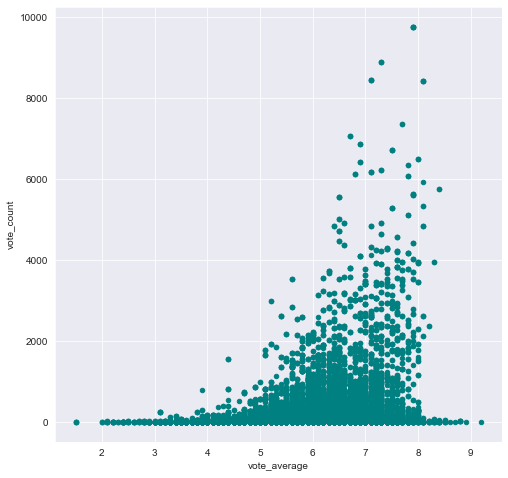

In [256]:
# Is larger vote count associated with higher voting average?
df.plot(x='vote_average', y= 'vote_count', kind='scatter', figsize=(8,8),color='teal');

Another interesting point to investigate would be to check whether popularity and average vote are associated. Is it that more popular movies are also associated with higher average vote?

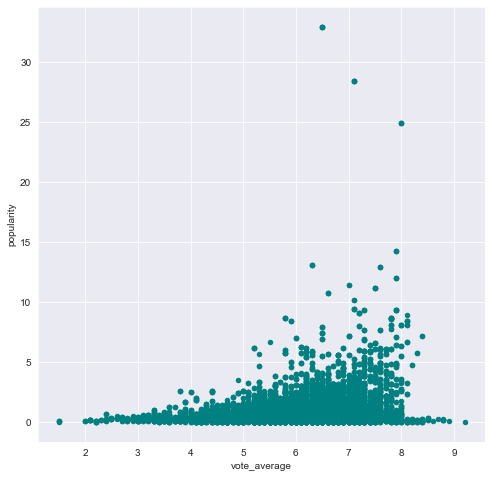

In [257]:
#Are movies with higher voting average associated with higher popularity?
df.plot(x='vote_average', y= 'popularity', kind='scatter', figsize=(8,8),color='teal');

From the above graph we can see that again there is a weak correlation between the average vote and the popularity each movie has received. We can even see a few cases where high popularity does not necessarily map to high average vote. The following plot shows more detailed the popularity vs the voting average for each movie gerne.

The above analysis of vote and popularity has not helped to draw any definite conclusions. It is evident that movies of Fantasy and Action type are more popular, however Documentaries and History shows have higher average rating. However the market is still making more dramas and comedies even though these are not at the top of any popularity/rating list. 

The below graph shows the popularity and average vote for each genre type.
We had done a similar numerical comparison above but the graph gives us a better indication of how popularity and average vote compare for each movie genre. We can observe that the movies with higher average vote are not necessarily having high popularity. For example Documentaries are not very popular but they have very high average rating. On the contrary Adventures are very popular but have lower average rating than other genres.

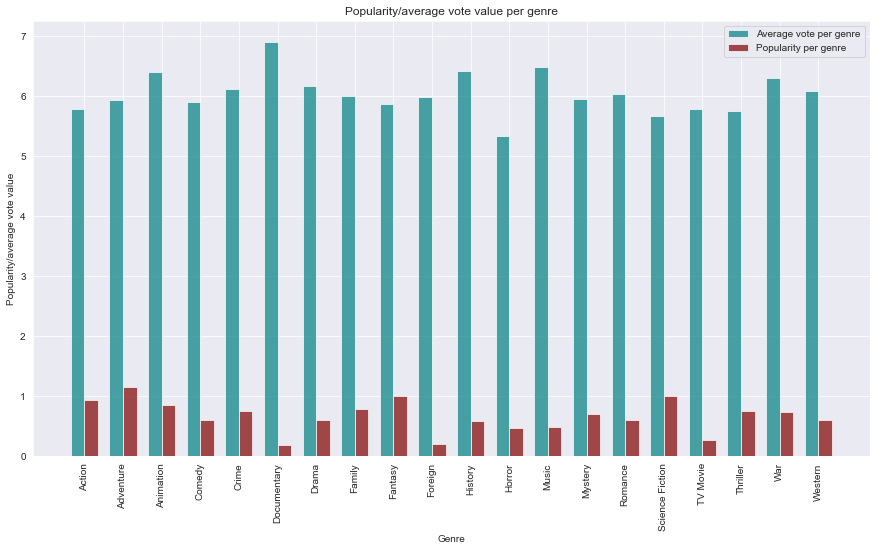

In [258]:
f,ax= plt.subplots(figsize=(15,8))

ind = np.arange(len(pop_per_genre))  # the x locations for the groups
width = 0.35                         # the width of the bars

# plot bars
teal_bars = plt.bar(ind, vote_per_genre, width, color='teal', alpha=.7, label='Average vote per genre')
maroon_bars = plt.bar(ind + width, pop_per_genre, width, color='maroon', alpha=.7, label='Popularity per genre')

# title and labels
plt.ylabel('Popularity/average vote value')
plt.xlabel('Genre')
plt.title('Popularity/average vote value per genre')
locations = ind + width / 2  # xtick locations
labels = pop_per_genre.index.array
plt.xticks(locations,labels,rotation=90)

# legend
plt.legend();


The above observations raise an important point. How can we measure the success of each movie genre? Popularity and average vote seem to be conflicting some times. So we need another measure of the success which would be more objective.
A more conclusive measure could be to analyse the revenue of each genre on average and compare it with the average cost for each movie type. This would give an indication of which genre is more profitable for the industry. 

# Q4: Which movie genre is more profitable?

Let's see if we need to do any data manipulations. During the visualisation of the data we observed that a lot of budget and revenue related values have no values (value is 0). Initially we did not remove these data points from our dataframe in order to not remove valueable points for the popularity/vote analysis. However now these 0 value data points are considered outliers and should be removed. In our profit analysis we will only consider the 2015 adjusted values in order to have a fair comparison.

In [259]:
cols = ['revenue_adj', 'budget_adj']
df[cols] = df[cols].replace(0,np.NaN)
df.isnull().sum()

popularity          0
budget          13354
revenue         14291
title               0
runtime             0
genres              0
release_date        0
vote_count          0
vote_average        0
year                0
budget_adj      13354
revenue_adj     14291
decade              0
dtype: int64

In [260]:
# Remove null data
df.dropna(inplace=True) 
df.isnull().sum()

popularity      0
budget          0
revenue         0
title           0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
year            0
budget_adj      0
revenue_adj     0
decade          0
dtype: int64

In [261]:
df.shape

(10303, 13)

First lets check if there is an obvious correlation between the budget and the revenue for each movie in the data set.

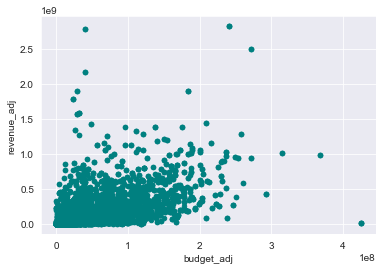

In [262]:
#Is there an obvious correlation btw budget spent and revenue?
df.plot(x='budget_adj', y='revenue_adj', kind='scatter', fig=(8,8), color='teal');


We can see that most movies are within the same revenue over budget ratio. However it would be interesting to perform the analysis of revenue and budget in order to determine which movie genre is more profitable on average.

Initially, we can visualise the budget spend on average by each genre in $.  
From the below graph we can see that Animation, Adventures and Fantasy are the 3 most expensive movie types to make. This does make sense as all of the above 3 might incluse CGI work and a lot of special effects.

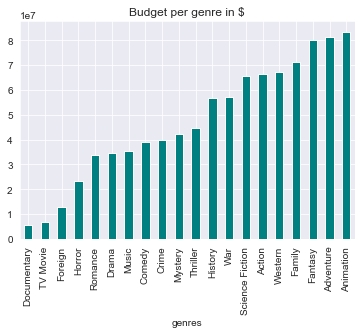

In [263]:
budget_per_genre= df.groupby('genres').mean().budget_adj.sort_values()

budget_per_genre.plot.bar(fig=(8,8), color='teal', title= 'Budget per genre in $');

Next we can do the same for the mean adjusted revenue for each movie genre.
From the below graph we can see that Animation, Adventures and Fantasy are again at the top of the chart with the higher revenues.

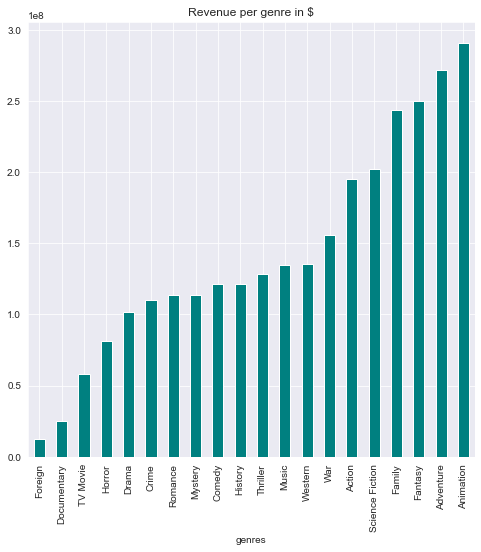

In [264]:
revenue_per_genre= df.groupby('genres').mean().revenue_adj.sort_values()

revenue_per_genre.plot.bar(figsize=(8,8), color='teal', title= 'Revenue per genre in $');

However the above absolute values do not make a lot of sense by themselves. 
It would be better to calculate the profit that each of the movie genres make on average in order to be able to conclude on which movie type is the most successul.                                                                                          
Profit calculation:
The profit will be the revenue minus the the cost (budget).

In [265]:
#Create a new column with the profit for each movie.
df['profit_adj'] = df['revenue_adj'] - df['budget_adj'] 

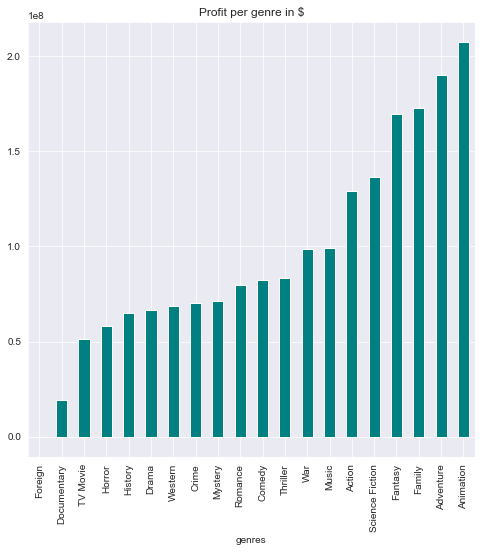

In [266]:
#Visualise the results
profit_per_genre= df.groupby('genres').mean().profit_adj

profit_per_genre.sort_values().plot.bar(figsize=(8,8), color='teal', title= 'Profit per genre in $');


From the above graph we can observe that Animations, adventures and all Science-fiction related movies are very profitable.
Action, Family and Music movies follow. On the lower side of the graph we can find Foreign movies, Documentaries as these refer to a more niche audience.


From the above we can see that the most profitable genre in the movie business is everything related to Animation, Adventures and Science Fiction. 

It is worth now to compare the profit of each movie genre with its popularity. Since the scale of the popularity is from 0 to 7 and the profit is in measured in hundreds of millions we will need to scale the down the profit values.

In [267]:
scale_factor = 0.5 * pow(10,-7)
profit_scaled_per_genre = profit_per_genre * scale_factor 

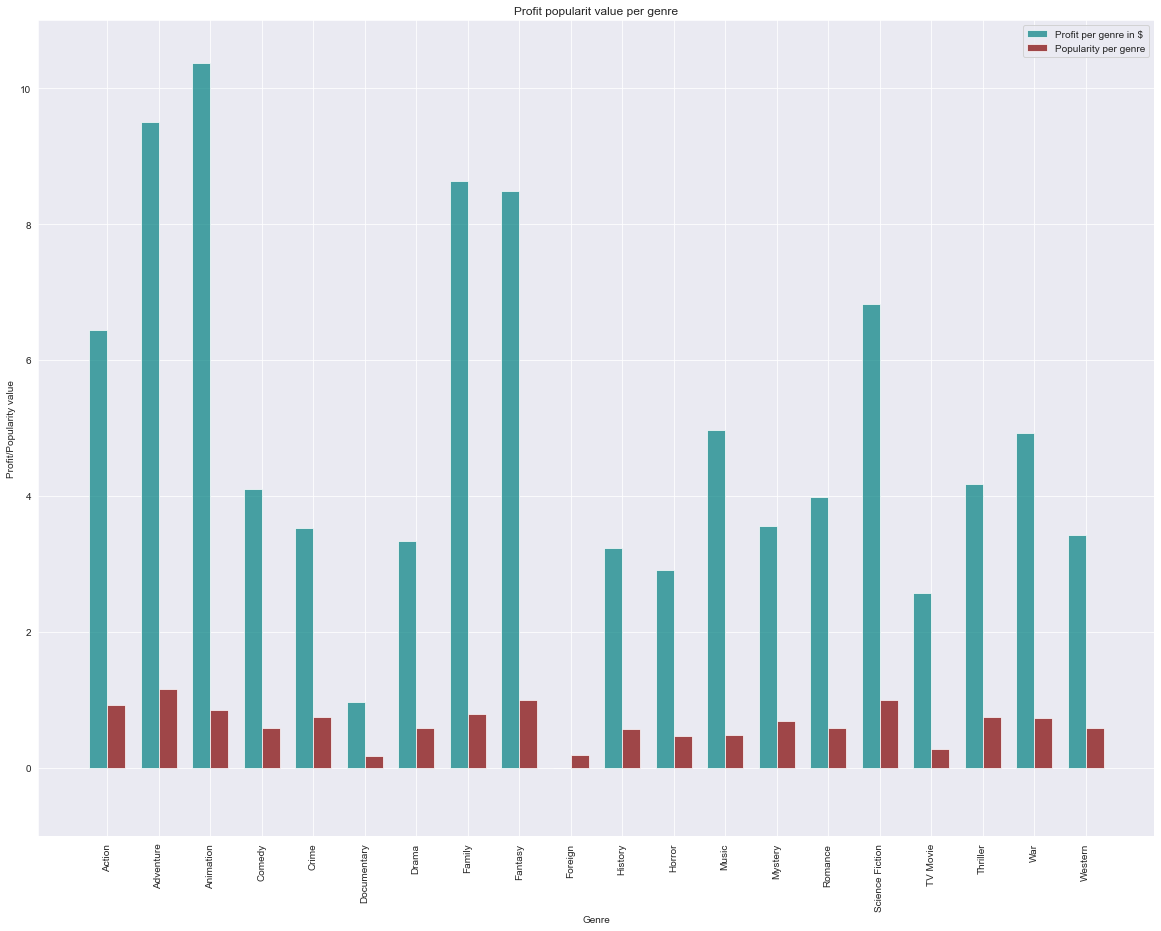

In [268]:
f,ax= plt.subplots(figsize=(20,15))

ind = np.arange(len(pop_per_genre))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
teal_bars = plt.bar(ind, profit_scaled_per_genre, width, color='teal', alpha=.7, label='Profit per genre in $')
maroon_bars = plt.bar(ind + width, pop_per_genre, width, color='maroon', alpha=.7, label='Popularity per genre')

# title and labels
plt.ylabel('Profit/Popularity value')
plt.xlabel('Genre')
plt.title('Profit popularit value per genre')
locations = ind + width / 2  # xtick locations
labels = pop_per_genre.index.array
plt.xticks(locations,labels,rotation=90)

plt.ylim([-1,11])

# legend
plt.legend();

From the above graph we can see that there is a correlation between the profit and the popularity of a movie type. Indeed Adventure, Action, Fantasy, Science Fiction have a have a high value for popularity and revenue. For our analysis this means that the popularity index could be a good indicator of which movie types are successful. One could use this parameter to investigate further the data, rather than diving into the details of the financial data.

Note: The reason why the Foreign movie profit does not appear in the plot above is because it has a very small value with respect to the other values in the series. In addition it is negative, which indicates that on average the Foreign movies are at a loss instead of having profit.

In [269]:
profit_scaled_per_genre['Foreign']

-0.008223196455937854

# Conclusions

The movie database has been analysed in order to extract information regarding the movie genres, profits, vote and popularity indeces. From the above we have observed the following:                                                                             
- There is a significant increase in movies made per year from the 60's until 2010. 
- There is a shift in the popularity of the movies towards Animation, Adventures and Action films, while the majority of the movies being made are still Drama and comedies. 
- There is a link between the the popularity index and the the net profit for the movie genres, and we can safely conclude that indeed the most popular movies are the ones that also have the most revenue. 


# Limitations/Considerations

At this point it is worth highlighting a few limitations and considerations derived from our dataset. 
- From our data wrangling process we had to eliminate a few of the columns as there were a lot of rows with NULL data. Unfortunately these columns did not contain enough datapoints in order to be considered a sufficient sample size that can be used to extract information from it. Examples of such columns are directors, taglines, keywords etc
- We also had to remove a small amount of movies that did not contain genre information. Luckily this accounted only for ~0.2% of the movies. It was deemed that removing these 23 movies would not affect the dataset integrity. 
- One important limitation to our analysis was the fact that the financial features of this dataset (budget/budget_adj and revenue/revenue_adj) had a lot of 0 value data. We have previously computed that over 50% of the dataset did not contain any info for the budget and revenue and for this reason they had to be removed from our analysis. This might have caused our sample size ~5000 movies to not be very representative of the whole population. However we needed to be able to work with the data so this sample size was used.
- We have used the adjusted financial values in order to be able to make a fair comparison and not account for the inflation.
- Another aspect that was not thoroughly investigated has to do with the average vote and the vote count. It is very likely that some movies will have higher average votes due to lower vote count. We have not taken this bias into account when looking into the vote average vs the popularity.
- Last but not least, we have accepted the popularity index without much information about how this is measured.

We need to take the above limitations/considerations into account when looking into the above conclusions.
